## Classification of HODA Dataset with KNN

In [1]:
from matplotlib import pyplot as plt
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset
print('Reading Train 60000.cdb ...')
train_images, train_labels = read_hoda_cdb('./DigitDB/Train 60000.cdb')
print('Reading Test 20000.cdb ...')
test_images, test_labels = read_hoda_cdb('./DigitDB/Test 20000.cdb')
print('Reading RemainingSamples.cdb ...')
remaining_images, remaining_labels = read_hoda_cdb('./DigitDB/RemainingSamples.cdb')
print('Reading train dataset (Train 60000.cdb)...')
X_train, Y_train = read_hoda_dataset(dataset_path='./DigitDB/Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=True,
                                reshape=True)
print('Reading test dataset (Test 20000.cdb)...')
X_test, Y_test = read_hoda_dataset(dataset_path='./DigitDB/Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=True,
                              reshape=True)
print('Reading remaining samples dataset (RemainingSamples.cdb)...')
X_remaining, Y_remaining = read_hoda_dataset('./DigitDB/RemainingSamples.cdb',
                                             images_height=32,
                                             images_width=32,
                                             one_hot=True,
                                             reshape=True)

Reading Train 60000.cdb ...
Reading Test 20000.cdb ...
Reading RemainingSamples.cdb ...
Reading train dataset (Train 60000.cdb)...
Reading test dataset (Test 20000.cdb)...
Reading remaining samples dataset (RemainingSamples.cdb)...


### We Must Work on these :

X_train , X_test , X_remaining

Y_train, Y_test , Y_remaining

In [2]:
print('X_train (Images) shape  :',X_train.shape,'----->','Must Reshape to (32,32)')
print('Y_train (Labels) shape :',Y_train.shape)
print('------------')
print('X_test (Images) shape  :',X_test.shape)
print('Y_test (Labels) shape :',Y_test.shape)
print('------------')
print('X_remaining (Images) shape :',X_remaining.shape,'----->','Must Reshape to (32,32)')
print('Y_remaining (Labels) shape :',Y_remaining.shape)


X_train (Images) shape  : (60000, 1024) -----> Must Reshape to (32,32)
Y_train (Labels) shape : (60000, 10)
------------
X_test (Images) shape  : (20000, 1024)
Y_test (Labels) shape : (20000, 10)
------------
X_remaining (Images) shape : (22352, 1024) -----> Must Reshape to (32,32)
Y_remaining (Labels) shape : (22352, 10)


### Importing Libraries

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

X_train & Y_train Samples

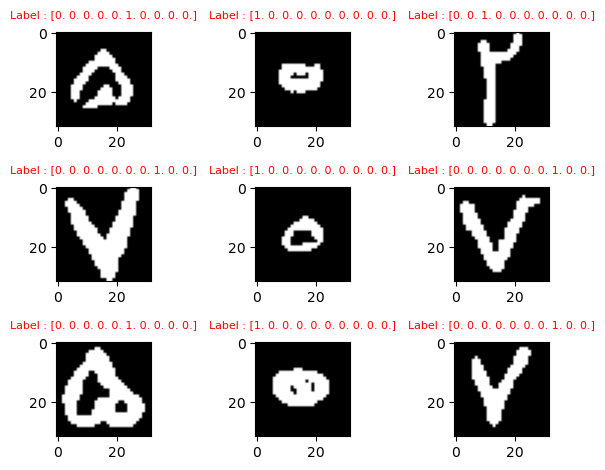

In [4]:
for i in range (1,10):
    plt.subplot(3,3,i)
    plt.tight_layout()
    plt.title('Label : '+str(Y_train[i]),pad=10,color='red',fontsize=8)
    plt.imshow((X_train[i].reshape(32,32)),cmap='gray')

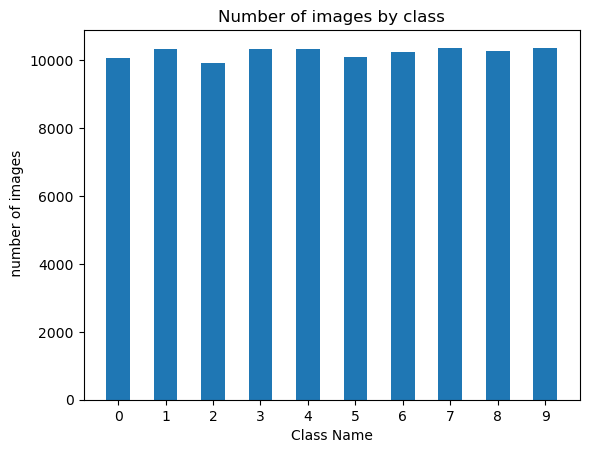

In [17]:
#EDA Part
#Identifying Class Imbalance (dataset paper informations used)
#Number of images in each class in dataset
number_classes = {'0':10070, '1':10330, '2':9923, '3':10334, '4':10333,
                  '5':10110, '6':10254, '7':10363, '8':10264, '9':10371}

plt.bar(number_classes.keys(), number_classes.values(), width=0.5)
plt.title("Number of images by class")
plt.xlabel('Class Name')
plt.ylabel(' number of images')

plt.show()

# EDA part
##### train datas informations like type, data type, min, max, shape.
##### we consider i=4 sample in train.

In [6]:
print('*************** all train images ****************')
print('X_train type:',type(X_train))
print('X_train data type:',X_train.dtype)
print('X_train data shape:',X_train.shape)
print('\n')
print('*************** one specific train image **************')
print('X_train[i] type:',type(X_train[4]))
print('X_train[i] data type:',X_train[4].dtype)
print('X_train[i] min:',X_train[4].min())
print('X_train[i] max:',X_train[4].max())
print('X_train[i] shape:',X_train[4].shape)
print('\n')
print('*************** all train labels *************')
print('Y_train type:',type(Y_train))
print('Y_train data type:',Y_train.dtype)
print('Y_train data shape:',Y_train.shape)
print('\n')
print('*************** one specific train label  *************')
print('Y_tain[i] type:', type(Y_train[4]))
print('Y_train[i] data type:', Y_train[4].dtype)
print('Y_trian[i] when one_hot=False:', Y_train[4])

*************** all train images ****************
X_train type: <class 'numpy.ndarray'>
X_train data type: float32
X_train data shape: (60000, 1024)


*************** one specific train image **************
X_train[i] type: <class 'numpy.ndarray'>
X_train[i] data type: float32
X_train[i] min: 0.0
X_train[i] max: 1.0
X_train[i] shape: (1024,)


*************** all train labels *************
Y_train type: <class 'numpy.ndarray'>
Y_train data type: float32
Y_train data shape: (60000, 10)


*************** one specific train label  *************
Y_tain[i] type: <class 'numpy.ndarray'>
Y_train[i] data type: float32
Y_trian[i] when one_hot=False: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Test Images EDA part
#### Test datas informations like type, data type, min, max, shape.
#### We consider i=4 sample in test.

In [7]:

print('----------------- all test images -----------------------')
print('X_test type:',type(X_test))
print('X_test data type:',X_test.dtype)
print('X_test data shape:',X_test.shape)
print('\n')
print('------------------- one specific test image -----------------------')
print('X_test[i] type:',type(X_test[4]))
print('X_test[i] data type:',X_test[4].dtype)
print('X_test[i] min:',X_test[4].min())
print('X_test[i] max:',X_test[4].max())
print('X_test[i] shape:',X_test[4].shape)
print('\n')
print('------------------- all test labels --------------------')
print('Y_test type:',type(Y_test))
print('Y_test data type:',Y_test.dtype)
print('Y_test data shape:',Y_test.shape)
print('\n')
print('--------------------- one specific test label --------------------')
print('Y_test[i] type:', type(Y_test[4]))
print('Y_test[i] data type:', Y_test[4].dtype)
print('Y_test[i] when one_hot=False:', Y_test[4])
print('\n')

----------------- all test images -----------------------
X_test type: <class 'numpy.ndarray'>
X_test data type: float32
X_test data shape: (20000, 1024)


------------------- one specific test image -----------------------
X_test[i] type: <class 'numpy.ndarray'>
X_test[i] data type: float32
X_test[i] min: 0.0
X_test[i] max: 1.0
X_test[i] shape: (1024,)


------------------- all test labels --------------------
Y_test type: <class 'numpy.ndarray'>
Y_test data type: float32
Y_test data shape: (20000, 10)


--------------------- one specific test label --------------------
Y_test[i] type: <class 'numpy.ndarray'>
Y_test[i] data type: float32
Y_test[i] when one_hot=False: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]




# EDA part
#### Remaining datas informations like type, data type, min, max, shape
#### We consider i=4 sample in remaining

In [8]:
print('/////////////////// all remaining images ////////////////////')
print('X_remaining type:',type(X_remaining))
print('X_remaining data type:',X_remaining.dtype)
print('X_remaining data shape:',X_remaining.shape)
print('\n')
print('/////////////////// one specific remaining image ///////////////////')
print('X_remaining[i] type:',type(X_remaining[4]))
print('X_remaining[i] data type:',X_remaining[4].dtype)
print('X_remaining[i] min:',X_remaining[4].min())
print('X_remaining[i] max:',X_remaining[4].max())
print('X_remaining[i] shape:',X_remaining[4].shape)
print('\n')
print('////////////////// all remaining labels //////////////////')
print('Y_remaining type:',type(Y_remaining))
print('Y_remaining data type:',Y_remaining.dtype)
print('Y_remaining data shape:',Y_remaining.shape)
print('\n')
print('/////////////////// one specific remaining label ///////////////////')
print('Y_remaining[i] type:', type(Y_remaining[4]))
print('Y_remaining[i] data type:', Y_remaining[4].dtype)
print('Y_remaining[i] when one_hot=False:', Y_remaining[4])
print('\n')

/////////////////// all remaining images ////////////////////
X_remaining type: <class 'numpy.ndarray'>
X_remaining data type: float32
X_remaining data shape: (22352, 1024)


/////////////////// one specific remaining image ///////////////////
X_remaining[i] type: <class 'numpy.ndarray'>
X_remaining[i] data type: float32
X_remaining[i] min: 0.0
X_remaining[i] max: 1.0
X_remaining[i] shape: (1024,)


////////////////// all remaining labels //////////////////
Y_remaining type: <class 'numpy.ndarray'>
Y_remaining data type: float32
Y_remaining data shape: (22352, 10)


/////////////////// one specific remaining label ///////////////////
Y_remaining[i] type: <class 'numpy.ndarray'>
Y_remaining[i] data type: float32
Y_remaining[i] when one_hot=False: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]




# EDA part
##### Show some image samples
##### We consider i=4 samples in train, test and remaining

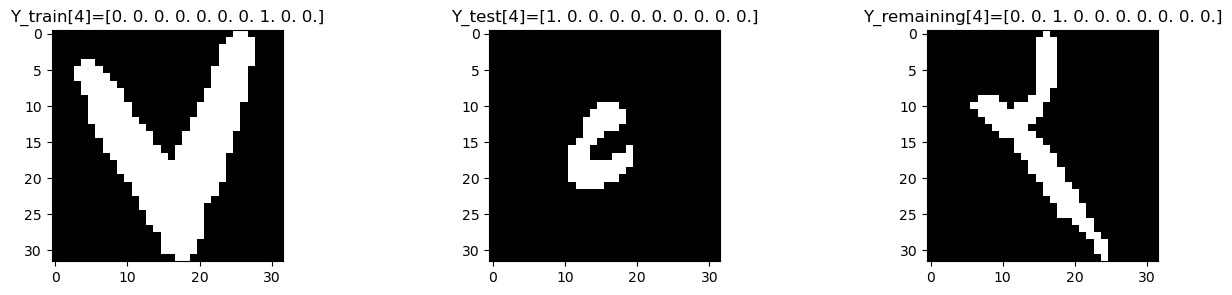

In [9]:
fig = plt.figure(figsize=(16, 3))
fig.add_subplot(1,3,1)
plt.title('Y_train[4]=' + str(Y_train[4]))
plt.imshow(X_train[4].reshape([32,32]), cmap='gray')

fig.add_subplot(1,3,2)
plt.title('Y_test[4]=' + str(Y_test[4]))
plt.imshow(X_test[4].reshape([32,32]), cmap='gray')

fig.add_subplot(1,3,3)
plt.title('Y_remaining[4]=' + str(Y_remaining[4]))
plt.imshow(X_remaining[4].reshape([32,32]), cmap='gray')

plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN(n_neighbors=3, weights='distance')
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

# Evaluate Model

In [11]:
import sklearn
import pandas as pd
import seaborn as sns

In [12]:
Y_pred = model.predict(X_test)

# Confusion matrix for test data

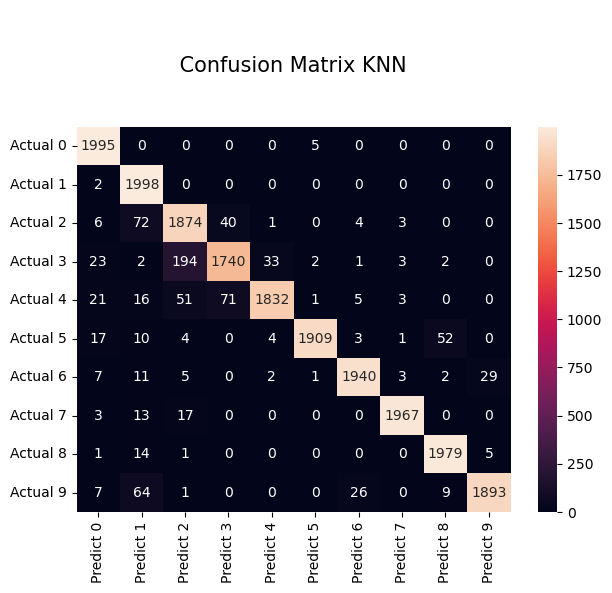


 ---------------- Classification Report KNN -------------------

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2000
           1       0.91      1.00      0.95      2000
           2       0.87      0.94      0.90      2000
           3       0.94      0.87      0.90      2000
           4       0.98      0.92      0.95      2000
           5       1.00      0.95      0.97      2000
           6       0.98      0.97      0.98      2000
           7       0.99      0.98      0.99      2000
           8       0.97      0.99      0.98      2000
           9       0.98      0.95      0.96      2000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



In [13]:
# confusion matrix for test data

confus_matrix = sklearn.metrics.confusion_matrix(Y_test.argmax(axis = 1), Y_pred.argmax(axis = 1))
# creat labels for column and row heat map matrix
RF_cm_df = pd.DataFrame(confus_matrix, index = [i for i in ["Actual 0","Actual 1","Actual 2","Actual 3", "Actual 4","Actual 5","Actual 6","Actual 7", "Actual 8","Actual 9"]],
 columns = [i for i in ["Predict 0", "Predict 1","Predict 2", "Predict 3", "Predict 4", "Predict 5","Predict 6", "Predict 7", "Predict 8", "Predict 9"]])
plt.figure(figsize=(7,5))
plt.title('\n\n Confusion Matrix KNN \n\n ', size=15)
sns.heatmap(RF_cm_df, annot=True, fmt='g') # creat heatmap for confusion matrix by color and write digits
plt.show()

# classification report for test data

print('\n ---------------- Classification Report KNN -------------------\n')
print(sklearn.metrics.classification_report(Y_test.argmax(axis = 1), Y_pred.argmax(axis = 1)))

# classification report for test data


In [14]:
print('\n ---------------- Classification Report KNN -------------------\n')
print(sklearn.metrics.classification_report(Y_test.argmax(axis = 1), Y_pred.argmax(axis = 1)))


 ---------------- Classification Report KNN -------------------

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2000
           1       0.91      1.00      0.95      2000
           2       0.87      0.94      0.90      2000
           3       0.94      0.87      0.90      2000
           4       0.98      0.92      0.95      2000
           5       1.00      0.95      0.97      2000
           6       0.98      0.97      0.98      2000
           7       0.99      0.98      0.99      2000
           8       0.97      0.99      0.98      2000
           9       0.98      0.95      0.96      2000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



### Visual display of incorrect predictions

In [15]:
p = np.argmax(Y_pred, axis=1) # Show class of every actual data 
y = np.argmax(Y_test, axis=1) # Show class of every Predict data 

Actual : 0
Predict : 5


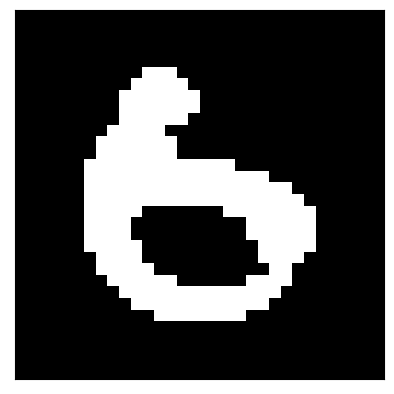

Actual : 0
Predict : 5


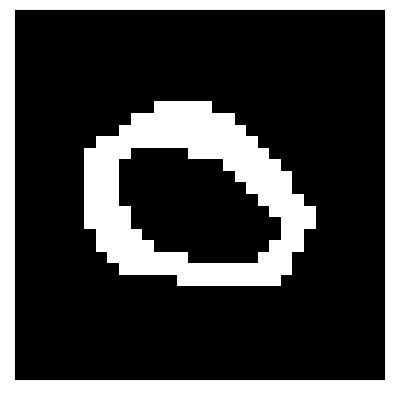

Actual : 0
Predict : 5


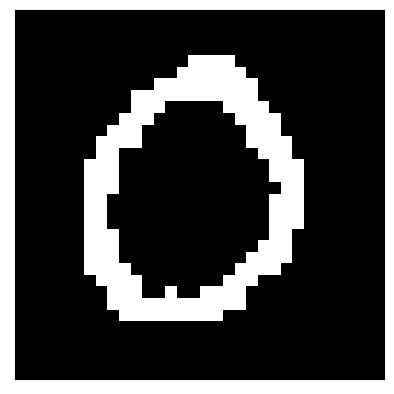

Actual : 0
Predict : 5


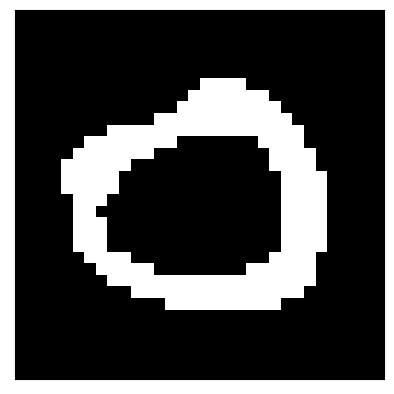

Actual : 0
Predict : 5


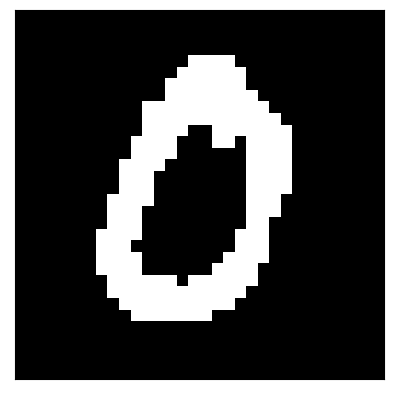

Actual : 1
Predict : 0


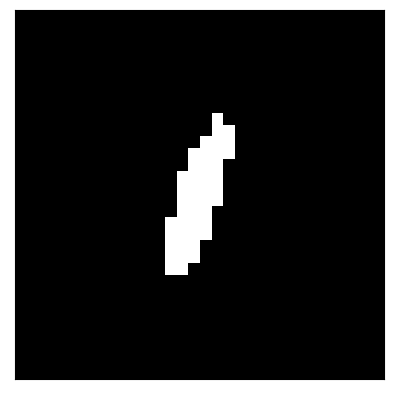

Actual : 1
Predict : 0


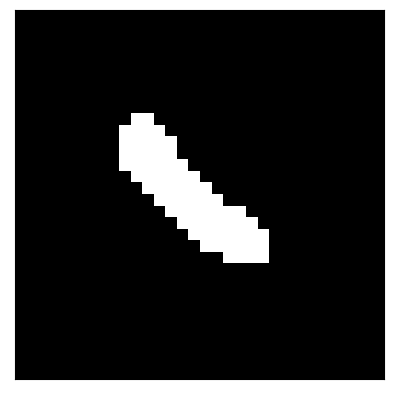

Actual : 2
Predict : 3


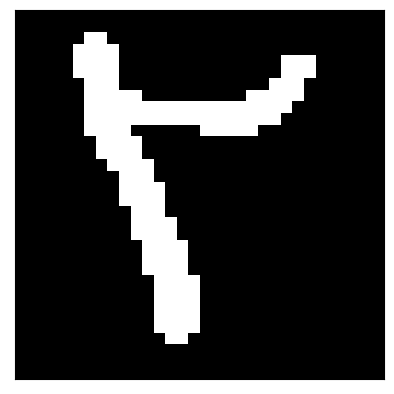

Actual : 2
Predict : 1


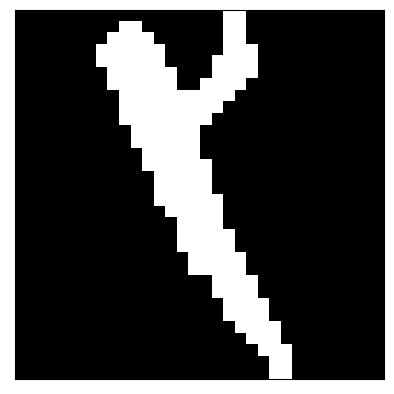

Actual : 2
Predict : 1


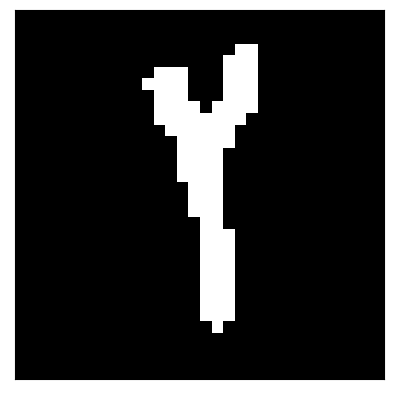

In [16]:
# Visual display of incorrect predictions
diff = np.where(p != y)[0] # find where had wrong predict
for i in range (10):
    print("Actual : {}".format(y[dif[i]])) 
    print("Predict : {}".format(p[dif[i]]))
    plt.figure()
    plt.imshow(X_test[dif[i]].reshape([32,32]), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()